In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

import mhcflurry as fl

from mhcflurry.downloads import get_path
from mhcflurry import Class1AffinityPredictor


In [4]:
#First load data

file_name = get_path("data_curated","curated_training_data.with_mass_spec.csv.bz2")
df = pd.read_csv(file_name)
print("There are %d Peptide-Allele measured values." % df.shape[0])
 

There are 525672 Peptide-Allele measured values.


In [5]:
display(df.head())

,allele,peptide,measurement_value,measurement_inequality,measurement_type,measurement_source,original_allele
0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101
1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101
2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801


In [15]:
#The algorith is designed to work with peptides from 8 to 15 aa. So filtering is needed
df = df.loc[(df.peptide.str.len() >7) & (df.peptide.str.len() < 16)]
print("There are %d Peptide-Allele measured values after filtering." % df.shape[0])

#Make a list of Alleles and the frecuencies 
alleleList = ((pd.DataFrame(np.transpose(np.unique(df.allele, return_counts = True)))))
alleleList.columns = ['Allele','Count']
#Choose alleles with more that 500 measured values
alleleList = alleleList[alleleList.Count >= 1000]
print("There are %d Alleles with more that 500 measured values." % alleleList.shape[0])

There are 512577 Peptide-Allele measured values after filtering.
There are 84 Alleles with more that 500 measured values.


In [7]:
results = np.zeros((2,100))
MSE = np.zeros((1,alleleList.shape[0]))
#dfATest has the Peptides that are NOT include in Training so we can use them for Test!!

#I use 900 for training out of 1000 so I can Test for 100
i=0
for m in alleleList['Allele']:
    Allele = m
    one_allele_td = df.loc[df.allele == Allele].sample(900)
    #fit the predictor with this data
    predictor = Class1AffinityPredictor()
    predictor.fit_allele_specific_predictors( n_models=1,
        architecture_hyperparameters_list=[{
        "layer_sizes": [300],
        "max_epochs": 100,
        "random_negative_constant": 1,
        }],
        peptides = one_allele_td.peptide.values,
        affinities = one_allele_td.measurement_value.values,
        allele=m)
    dfA = df.loc[df.allele == Allele].copy()
    dfATest = dfA[~dfA.peptide.isin(one_allele_td.peptide)].copy()
    display(i)
    for k in range(0,100):
        results[0][k] =dfATest.measurement_value.values[k]
        results[1][k] = predictor.predict([dfATest.peptide.values[k]],allele=m)

    MSE[0][i] = ((results[0]-results[1])**2).mean(axis=0) 
    i=i+1




Using TensorFlow backend.


[  900 peptides ]  Epoch   0 / 100: loss=1.74289. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  69 / 100: loss=0.0167768. Min val loss (0.015349124558269978) at epoch 48


0

[  900 peptides ]  Epoch   0 / 100: loss=1.80792. Min val loss (None) at epoch None


1

[  900 peptides ]  Epoch   0 / 100: loss=1.81058. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  79 / 100: loss=0.0440301. Min val loss (0.057714708149433136) at epoch 58


2

[  900 peptides ]  Epoch   0 / 100: loss=1.82473. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  57 / 100: loss=0.0436927. Min val loss (0.048435311764478683) at epoch 36


3

[  900 peptides ]  Epoch   0 / 100: loss=1.79861. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  75 / 100: loss=0.0322328. Min val loss (0.032395198941230774) at epoch 54


4

[  900 peptides ]  Epoch   0 / 100: loss=1.80809. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  54 / 100: loss=0.0484884. Min val loss (0.05758345127105713) at epoch 33


5

[  900 peptides ]  Epoch   0 / 100: loss=1.85325. Min val loss (None) at epoch None


6

[  900 peptides ]  Epoch   0 / 100: loss=1.83219. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  98 / 100: loss=0.0465075. Min val loss (0.06937084347009659) at epoch 77


7

[  900 peptides ]  Epoch   0 / 100: loss=1.77273. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  65 / 100: loss=0.0170255. Min val loss (0.01534095499664545) at epoch 44


8

[  900 peptides ]  Epoch   0 / 100: loss=1.83696. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  83 / 100: loss=0.0484325. Min val loss (0.07486601173877716) at epoch 62


9

[  900 peptides ]  Epoch   0 / 100: loss=1.7903. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  54 / 100: loss=0.0197504. Min val loss (0.02295522391796112) at epoch 33


10

[  900 peptides ]  Epoch   0 / 100: loss=1.87282. Min val loss (None) at epoch None


11

[  900 peptides ]  Epoch   0 / 100: loss=1.85574. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  93 / 100: loss=0.0374097. Min val loss (0.054919563233852386) at epoch 72


12

[  900 peptides ]  Epoch   0 / 100: loss=1.8728. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  73 / 100: loss=0.0373218. Min val loss (0.0401049368083477) at epoch 52


13

[  900 peptides ]  Epoch   0 / 100: loss=1.80128. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  73 / 100: loss=0.0322579. Min val loss (0.03905550390481949) at epoch 58
[  900 peptides ]  Stopping at epoch  79 / 100: loss=0.0314227. Min val loss (0.03905550390481949) at epoch 58


14

[  900 peptides ]  Epoch   0 / 100: loss=1.76816. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  63 / 100: loss=0.0415487. Min val loss (0.04576600342988968) at epoch 42


15

[  900 peptides ]  Epoch   0 / 100: loss=1.81535. Min val loss (None) at epoch None


16

[  900 peptides ]  Epoch   0 / 100: loss=1.77968. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  88 / 100: loss=0.0321172. Min val loss (0.04065939411520958) at epoch 67


17

[  900 peptides ]  Epoch   0 / 100: loss=1.87503. Min val loss (None) at epoch None


18

[  900 peptides ]  Epoch   0 / 100: loss=1.82396. Min val loss (None) at epoch None


19

[  900 peptides ]  Epoch   0 / 100: loss=1.85178. Min val loss (None) at epoch None


20

[  900 peptides ]  Epoch   0 / 100: loss=1.79192. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  55 / 100: loss=0.0336053. Min val loss (0.03980488330125809) at epoch 34


21

[  900 peptides ]  Epoch   0 / 100: loss=1.83612. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0424512. Min val loss (0.052525319159030914) at epoch 46


22

[  900 peptides ]  Epoch   0 / 100: loss=1.85327. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  68 / 100: loss=0.0483424. Min val loss (0.06716795265674591) at epoch 47


23

[  900 peptides ]  Epoch   0 / 100: loss=1.82799. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  83 / 100: loss=0.0390665. Min val loss (0.04912123829126358) at epoch 62


24

[  900 peptides ]  Epoch   0 / 100: loss=1.8228. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  77 / 100: loss=0.0454886. Min val loss (0.05689745768904686) at epoch 56


25

[  900 peptides ]  Epoch   0 / 100: loss=1.84191. Min val loss (None) at epoch None


26

[  900 peptides ]  Epoch   0 / 100: loss=1.79746. Min val loss (None) at epoch None


27

[  900 peptides ]  Epoch   0 / 100: loss=1.79703. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  66 / 100: loss=0.0466101. Min val loss (0.05443325638771057) at epoch 45


28

[  900 peptides ]  Epoch   0 / 100: loss=1.81893. Min val loss (None) at epoch None


29

[  900 peptides ]  Epoch   0 / 100: loss=1.82693. Min val loss (None) at epoch None


30

[  900 peptides ]  Epoch   0 / 100: loss=1.79646. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  78 / 100: loss=0.0180194. Min val loss (0.016986548900604248) at epoch 57


31

[  900 peptides ]  Epoch   0 / 100: loss=1.81481. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  96 / 100: loss=0.0267855. Min val loss (0.02587701566517353) at epoch 75


32

[  900 peptides ]  Epoch   0 / 100: loss=1.79801. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  63 / 100: loss=0.0346232. Min val loss (0.04524041339755058) at epoch 42


33

[  900 peptides ]  Epoch   0 / 100: loss=1.82595. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0216581. Min val loss (0.01836906187236309) at epoch 46


34

[  900 peptides ]  Epoch   0 / 100: loss=1.78891. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  62 / 100: loss=0.0342179. Min val loss (0.03426274657249451) at epoch 41


35

[  900 peptides ]  Epoch   0 / 100: loss=1.88183. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  77 / 100: loss=0.0405542. Min val loss (0.054188914597034454) at epoch 56


36

[  900 peptides ]  Epoch   0 / 100: loss=1.76001. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  81 / 100: loss=0.0167926. Min val loss (0.015269000083208084) at epoch 60


37

[  900 peptides ]  Epoch   0 / 100: loss=1.82077. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  97 / 100: loss=0.028947. Min val loss (0.03450695425271988) at epoch 76


38

[  900 peptides ]  Epoch   0 / 100: loss=1.7664. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  56 / 100: loss=0.0177814. Min val loss (0.015931520611047745) at epoch 35


39

[  900 peptides ]  Epoch   0 / 100: loss=1.76964. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  43 / 100: loss=0.0174401. Min val loss (0.015965892001986504) at epoch 22


40

[  900 peptides ]  Epoch   0 / 100: loss=1.78465. Min val loss (None) at epoch None


41

[  900 peptides ]  Epoch   0 / 100: loss=1.79388. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  72 / 100: loss=0.0201286. Min val loss (0.017721116542816162) at epoch 51


42

[  900 peptides ]  Epoch   0 / 100: loss=1.76587. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  55 / 100: loss=0.0281149. Min val loss (0.028744954615831375) at epoch 34


43

[  900 peptides ]  Epoch   0 / 100: loss=1.78079. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  44 / 100: loss=0.0206178. Min val loss (0.015957562252879143) at epoch 23


44

[  900 peptides ]  Epoch   0 / 100: loss=1.77795. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  65 / 100: loss=0.0168135. Min val loss (0.015447205863893032) at epoch 44


45

[  900 peptides ]  Epoch   0 / 100: loss=1.76321. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  83 / 100: loss=0.016723. Min val loss (0.015294229611754417) at epoch 62


46

[  900 peptides ]  Epoch   0 / 100: loss=1.76717. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  79 / 100: loss=0.0178481. Min val loss (0.015233509242534637) at epoch 58


47

[  900 peptides ]  Epoch   0 / 100: loss=1.79242. Min val loss (None) at epoch None


48

[  900 peptides ]  Epoch   0 / 100: loss=1.78307. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  98 / 100: loss=0.0242694. Min val loss (0.024554146453738213) at epoch 77


49

[  900 peptides ]  Epoch   0 / 100: loss=1.80944. Min val loss (None) at epoch None


50

[  900 peptides ]  Epoch   0 / 100: loss=1.76341. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0203394. Min val loss (0.017045728862285614) at epoch 46


51

[  900 peptides ]  Epoch   0 / 100: loss=1.81055. Min val loss (None) at epoch None


52

[  900 peptides ]  Epoch   0 / 100: loss=1.75923. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  65 / 100: loss=0.0239099. Min val loss (0.026164233684539795) at epoch 44


53

[  900 peptides ]  Epoch   0 / 100: loss=1.78323. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  88 / 100: loss=0.0274101. Min val loss (0.029642688110470772) at epoch 67


54

[  900 peptides ]  Epoch   0 / 100: loss=1.79466. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  78 / 100: loss=0.0272549. Min val loss (0.027194665744900703) at epoch 57


55

[  900 peptides ]  Epoch   0 / 100: loss=1.78112. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  65 / 100: loss=0.0308445. Min val loss (0.03134380280971527) at epoch 44


56

[  900 peptides ]  Epoch   0 / 100: loss=1.81308. Min val loss (None) at epoch None


57

[  900 peptides ]  Epoch   0 / 100: loss=1.80515. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  71 / 100: loss=0.0325461. Min val loss (0.0322868749499321) at epoch 50


58

[  900 peptides ]  Epoch   0 / 100: loss=1.83693. Min val loss (None) at epoch None


59

[  900 peptides ]  Epoch   0 / 100: loss=1.81277. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0430236. Min val loss (0.040841203182935715) at epoch 46


60

[  900 peptides ]  Epoch   0 / 100: loss=1.76509. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  78 / 100: loss=0.02849. Min val loss (0.02453094907104969) at epoch 57


61

[  900 peptides ]  Epoch   0 / 100: loss=1.83445. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  63 / 100: loss=0.0359271. Min val loss (0.04600311815738678) at epoch 42


62

[  900 peptides ]  Epoch   0 / 100: loss=1.76757. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  49 / 100: loss=0.0167805. Min val loss (0.015300154685974121) at epoch 28


63

[  900 peptides ]  Epoch   0 / 100: loss=1.73563. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  96 / 100: loss=0.0168067. Min val loss (0.015234431251883507) at epoch 75


64

[  900 peptides ]  Epoch   0 / 100: loss=1.76599. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  81 / 100: loss=0.032313. Min val loss (0.025504617020487785) at epoch 60


65

[  900 peptides ]  Epoch   0 / 100: loss=1.7577. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  57 / 100: loss=0.0184797. Min val loss (0.01643793284893036) at epoch 36


66

[  900 peptides ]  Epoch   0 / 100: loss=1.75163. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  58 / 100: loss=0.0218826. Min val loss (0.02343226782977581) at epoch 37


67

[  900 peptides ]  Epoch   0 / 100: loss=1.77372. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  62 / 100: loss=0.0198018. Min val loss (0.018644258379936218) at epoch 41


68

[  900 peptides ]  Epoch   0 / 100: loss=1.77749. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  49 / 100: loss=0.0297058. Min val loss (0.025563623756170273) at epoch 28


69

[  900 peptides ]  Epoch   0 / 100: loss=1.78554. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0187543. Min val loss (0.018333589658141136) at epoch 46


70

[  900 peptides ]  Epoch   0 / 100: loss=1.75678. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  62 / 100: loss=0.0202538. Min val loss (0.020949307829141617) at epoch 41


71

[  900 peptides ]  Epoch   0 / 100: loss=1.77092. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  67 / 100: loss=0.0185615. Min val loss (0.01939953863620758) at epoch 46


72

[  900 peptides ]  Epoch   0 / 100: loss=1.78201. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  50 / 100: loss=0.0278372. Min val loss (0.026008646935224533) at epoch 29


73

[  900 peptides ]  Epoch   0 / 100: loss=1.75974. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  62 / 100: loss=0.0242033. Min val loss (0.032555125653743744) at epoch 41


74

[  900 peptides ]  Epoch   0 / 100: loss=1.78754. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  70 / 100: loss=0.0207654. Min val loss (0.02229415439069271) at epoch 49


75

[  900 peptides ]  Epoch   0 / 100: loss=1.76156. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  70 / 100: loss=0.016727. Min val loss (0.01534733921289444) at epoch 49


76

[  900 peptides ]  Epoch   0 / 100: loss=1.84136. Min val loss (None) at epoch None


77

[  900 peptides ]  Epoch   0 / 100: loss=1.84292. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  89 / 100: loss=0.0489284. Min val loss (0.06464552879333496) at epoch 68


78

[  900 peptides ]  Epoch   0 / 100: loss=1.87273. Min val loss (None) at epoch None


79

[  900 peptides ]  Epoch   0 / 100: loss=1.83735. Min val loss (None) at epoch None


80

[  900 peptides ]  Epoch   0 / 100: loss=1.82446. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  63 / 100: loss=0.0364333. Min val loss (0.043047621846199036) at epoch 42


81

[  900 peptides ]  Epoch   0 / 100: loss=1.84912. Min val loss (None) at epoch None


82

[  900 peptides ]  Epoch   0 / 100: loss=1.82838. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  76 / 100: loss=0.0383862. Min val loss (0.041093118488788605) at epoch 70


83

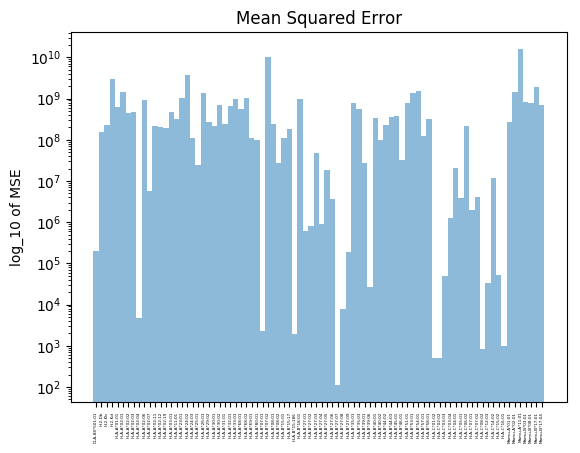

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = alleleList.Allele
y_pos = np.arange(len(objects))

plt.bar(y_pos,MSE[0],align='center',alpha = 0.5,width=1,log=True)
plt.xticks(y_pos, objects,rotation=90,fontsize=3)
plt.ylabel('log_10 of MSE')
plt.title('Mean Squared Error')

plt.show()